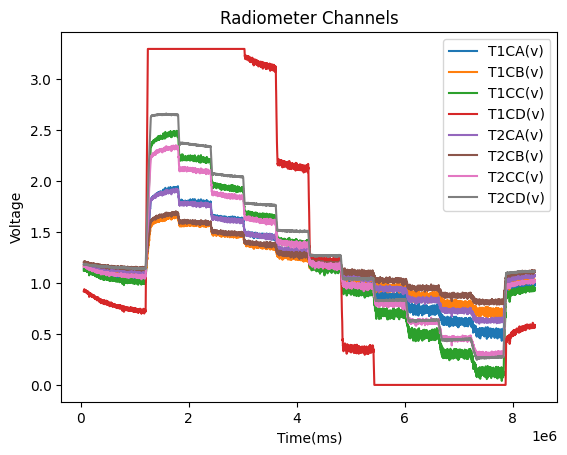

In [57]:
#imports
from os import walk
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from scipy.optimize import curve_fit
import scipy.signal

# -------------ADJUST FOR YOUR PROCEDURE------------------#
sensor_file = 'Data/radiometer1_25_5-55_062923_sensor.csv'

offset = 60000 * 1 #value should be 60000 * minutes for how long the sensor was on before sweep
temp_ranges = np.arange(55, 0, -5) #range and interval of temperature steps
time_interval = 10 #minute length that each temperature is held

time_interval_ms = 60000 * time_interval #convert minutes to milliseconds
begin_cutoff = 60000 * 3 #60000 * number of minutes to cut off from beginning of each temp
end_cutoff = 60000 * 1 #60000 * number of minutes to cut off from ending of each temp

# -------------UNCOMMENT FOR PLOTTING BB TEMP------------------#
#bb_file = 'Data/radiometer1_30_5-55_061623_BB.txt'

# bb_df = pd.read_csv(bb_file) #read blackbody temperatures from text file
#bb_df.to_csv(r'Data/radiometer1_30_5-55_061623_BB.csv', index = None)

#bb_df.columns = ['BB Temp']
#display(bb_df)
# -------------UNCOMMENT FOR PLOTTING BB TEMP------------------#

data = pd.read_csv(sensor_file)

channel_col = []
internal_col = []
nums = [1,2]
channels = ['A', 'B', 'C', 'D']
for num in nums:
     for chan in channels:
          channel_col.append("T" + str(num) + "C" + str(chan) + "(v)")
     internal_col.append("T" + str(num) +"Therm(c)")

# -------------UNCOMMENT FOR ROLLING WINDOW------------------#
""" window_size = 25 
#window = scipy.signal.gaussian(M=30, std=6)
#smoothed = np.convolve(data[channel_col], window, mode='valid')
data_rolling = data[channel_col].rolling(window_size).mean()
#data_rolling = smoothed

data_rolling.insert(loc = 0,
     column = "Time(ms)",
     value = data["Time(ms)"])
data_rolling.drop(data_rolling.index[:window_size], inplace=True)
display(data_rolling)
plt.figure()
data_rolling.plot(x = "Time(ms)", y = channel_col)
data = data_rolling """

# -------------UNCOMMENT FOR ROLLING WINDOW------------------#     

#channel_col.remove("T1CD(v)") #used to remove clipping channel
data[data["Time(ms)"] > offset].plot(x = "Time(ms)", y = channel_col)
plt.title("Radiometer Channels")
plt.ylabel("Voltage")
plt.show()




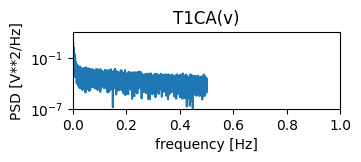

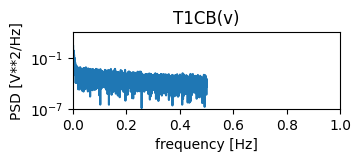

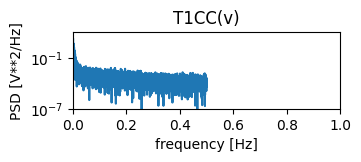

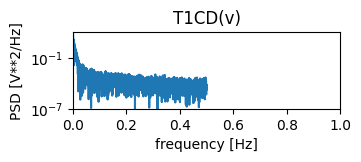

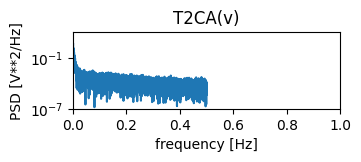

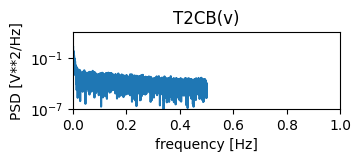

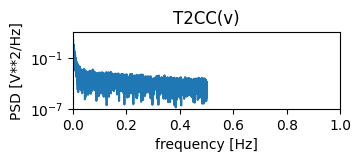

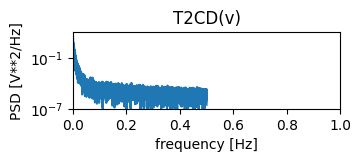

In [58]:
#calculates PSD

i = 1
for ch in channel_col:
    ax = plt.subplot(3, 4, i)
    plt.subplots_adjust(left=0.1, right=1.9, bottom=0.1, top=0.9, wspace=0.1, hspace=1)
    (f, S) = scipy.signal.periodogram(data[ch], 1, scaling='density')

    plt.semilogy(f, S)
    plt.ylim([1e-7, 1e2])
    plt.xlim([0,1])
    plt.title(ch)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.show()
    i += 1

Segment the data into different BB temps

In [59]:
#segment the data into the different BB temps
temp_dict = {}
lower_bound = offset #time after s

#create dictionary of dataframes, cutoff 5 minutes from begininng and half a minute from the end to obtain stabilized temp
for i in range(0, temp_ranges.size): 
    temp_dict[str(temp_ranges[i])] = data[(data["Time(ms)"] > (lower_bound+begin_cutoff)) & (data["Time(ms)"] < (lower_bound + time_interval_ms-end_cutoff))]
    lower_bound += time_interval_ms

Plot the sensor readings at different blackbody temperatures

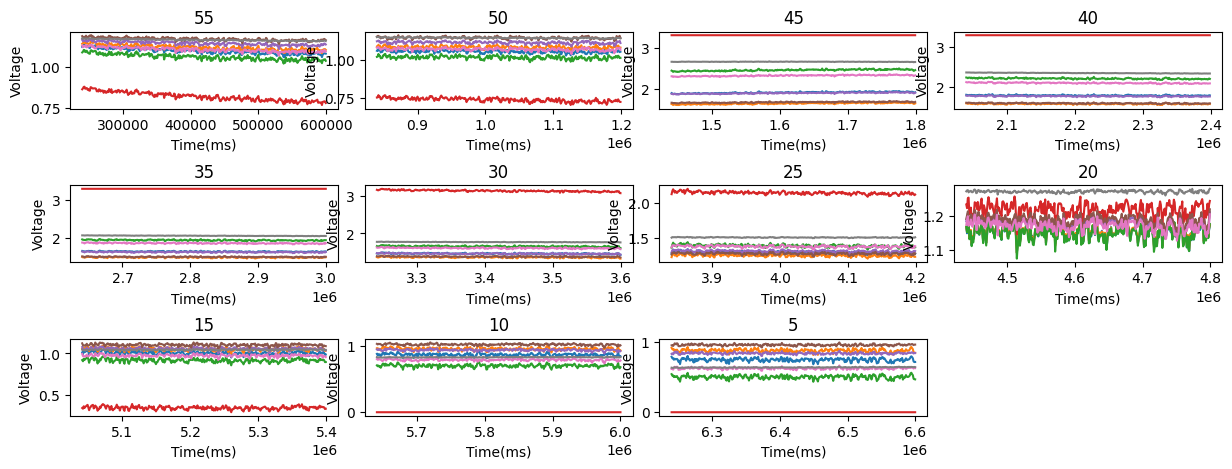

,Time(ms),T1CA(v),T1CB(v),T1CC(v),T1CD(v),T1Therm(c),T2CA(v),T2CB(v),T2CC(v),T2CD(v),T2Therm(c)
Max at 55,599469.0,1.134602,1.154441,1.102360,0.880096,25.559712,1.171433,1.191642,1.134435,1.173116,24.595251
VPP55,359184.0,0.075724,0.071244,0.082569,0.110883,0.140756,0.063306,0.053628,0.066644,0.019826,0.151261
Max at 50,1199266.0,1.074517,1.103893,1.040317,0.765792,25.754043,1.131939,1.162983,1.087389,1.152509,24.786060
VPP50,359188.0,0.046474,0.045458,0.056409,0.065562,0.107578,0.045083,0.042925,0.050558,0.015023,0.114535
Max at 45,1799076.0,1.944909,1.681788,2.495208,3.299535,26.374884,1.927471,1.704998,2.353303,2.665732,25.408529
VPP45,358064.0,0.077146,0.077571,0.089072,0.000006,0.423680,0.068666,0.065132,0.070040,0.021988,0.432409
Max at 40,2398885.0,1.824600,1.613534,2.256863,3.299534,27.160147,1.798845,1.619571,2.132189,2.366689,26.183852
VPP40,358053.0,0.062754,0.062539,0.077559,0.000006,0.456128,0.056742,0.051118,0.062277,0.029603,0.446445
Max at 35,2999812.0,1.656124,1.502314,1.965135,3.299532,27.680632,1.639637,1.509818,1.880169,2.063596,26.703986
VPP35,359218.0,0.059319,0.059883,0.072718,0.000007,0.280052,0.052814,0.047400,0.059537,0.025721,0.278479


In [60]:
temp_max_min = pd.DataFrame()
temp_plots = plt.figure().tight_layout()
i = 1

for key in temp_dict:
    ax = plt.subplot(3, 4, i)
    plt.subplots_adjust(left=0.1, right=1.9, bottom=0.1, top=0.9, wspace=0.1, hspace=1)

    plt.plot(temp_dict[key].loc[:,"Time(ms)"], temp_dict[key].loc[:,channel_col])
    plt.title(key)
    plt.ylabel("Voltage")
    plt.xlabel("Time(ms)")
    #plt.legend(channel_col, fontsize = 5)
    i += 1
    max_temp = temp_dict[key].max() #get max temps
    max_temp_df = pd.DataFrame({'Max at ' + str(key): max_temp}).T

    min_temp = temp_dict[key].min() #get min temps 
    min_temp_df = pd.DataFrame({'Min at ' + str(key): min_temp}).T

    vpp = max_temp - min_temp #calculate peak-to-peak
    vpp_df = pd.DataFrame({'VPP' + str(key): vpp}).T
    temp_max_min= pd.concat([temp_max_min, max_temp_df, vpp_df]) #transpose

plt.show()
display(temp_max_min) #plot segmented temp data

In [61]:
#create histograms for each channel
""" for key in temp_dict:
    plt.figure()
    temp = temp_dict[key]
    i = 1
    for chan in channel_col:
        plt.subplot(2, 4, i)
        plt.hist(temp[chan], bins=30, density=True, alpha=0.6, color='g')
        plt.title(chan)
        i += 1 """

" for key in temp_dict:\n    plt.figure()\n    temp = temp_dict[key]\n    i = 1\n    for chan in channel_col:\n        plt.subplot(2, 4, i)\n        plt.hist(temp[chan], bins=30, density=True, alpha=0.6, color='g')\n        plt.title(chan)\n        i += 1 "

In [62]:
#calculate averages, std devs and rms values
ch_avgs = pd.DataFrame()
ch_std_dev = pd.DataFrame()
ch_rms = pd.DataFrame()
for key in temp_dict:
    temps = temp_dict[key]
    ch_avgs[key] = temps[channel_col].mean()
    ch_std_dev[key] = temps[channel_col].std()
    ch_rms[key]  = np.sqrt((temps[channel_col] ** 2).mean())
ch_avgs=ch_avgs.T
ch_avgs.insert(loc = 0,
          column = 'Temp',
          value = temp_ranges)
ch_std_dev =ch_std_dev.T
ch_std_dev.insert(loc = 0,
          column = 'Temp',
          value = temp_ranges)

ch_rms =ch_rms.T
ch_rms.insert(loc = 0,
          column = 'Temp',
          value = temp_ranges)

# -------------UNCOMMENT FOR PLOT OF AVERAGE VOLTAGE VS. BB TEMP------------------#
""" plt.plot(ch_avgs.loc[:,"Temp"], ch_avgs.loc[:,channel_col], marker = '.')
plt.legend(channel_col, fontsize = 5)
plt.xlabel("Temp (\N{DEGREE CELSIUS})")
plt.ylabel("Average Voltage (V)")
plt.title("Avg. Voltage vs. Blackbody Temperature") """
# -------------UNCOMMENT FOR PLOT OF AVERAGE VOLTAGE VS. BB TEMP------------------#

display(ch_avgs) #display statistics
display(ch_std_dev)
#display(ch_rms)

,Temp,T1CA(v),T1CB(v),T1CC(v),T1CD(v),T2CA(v),T2CB(v),T2CC(v),T2CD(v)
55,55,1.095564,1.118090,1.060023,0.820919,1.142355,1.168196,1.103850,1.163179
50,50,1.055042,1.083630,1.015862,0.735265,1.114096,1.145904,1.069168,1.145589
45,45,1.907555,1.641207,2.451619,3.299532,1.893826,1.672775,2.319508,2.654728
40,40,1.791876,1.578517,2.214010,3.299531,1.771386,1.594847,2.102245,2.351712
35,35,1.630426,1.475240,1.932533,3.299528,1.615613,1.488392,1.851769,2.050996
30,30,1.463113,1.364125,1.654819,3.139000,1.460451,1.380822,1.608597,1.769919
25,25,1.301807,1.254907,1.393171,2.141654,1.315910,1.281205,1.382330,1.510218
20,20,1.150705,1.152480,1.149520,1.215714,1.179772,1.186907,1.170262,1.268728
15,15,1.004183,1.051027,0.916708,0.348814,1.054874,1.101681,0.973820,1.043550
10,10,0.871948,0.961215,0.704804,0.000239,0.942010,1.026128,0.793642,0.833340


,Temp,T1CA(v),T1CB(v),T1CC(v),T1CD(v),T2CA(v),T2CB(v),T2CC(v),T2CD(v)
55,55,0.016028,0.014894,0.017543,0.025667,0.011080,0.009543,0.012816,0.004731
50,50,0.009191,0.009244,0.010866,0.013019,0.007729,0.007312,0.008173,0.002805
45,45,0.017883,0.016770,0.018542,0.000001,0.014058,0.012480,0.014300,0.002678
40,40,0.010606,0.010735,0.014300,0.000001,0.010316,0.009703,0.011997,0.007487
35,35,0.010596,0.010621,0.013294,0.000001,0.010347,0.009776,0.011389,0.005551
30,30,0.013380,0.013611,0.016204,0.021653,0.012317,0.011752,0.013218,0.004319
25,25,0.015409,0.015522,0.017768,0.018964,0.013023,0.012649,0.013797,0.003556
20,20,0.017233,0.017719,0.020199,0.019158,0.013771,0.013159,0.014040,0.003375
15,15,0.018005,0.018204,0.020071,0.018799,0.013778,0.013400,0.014160,0.003697
10,10,0.018593,0.018954,0.021137,0.000001,0.012676,0.012451,0.012948,0.003494


In [63]:
#Planck Radiance
def planck_radiance(wavelength, temperature):
    h = 6.62607015e-34  # Planck's constant
    c = 299792458  # Speed of light
    k = 1.38064852e-23  # Boltzmann constant

    #convert celsius to Kelvin
    temperature += 273.15
    
    numerator = 2 * h * c ** 2
    denominator = wavelength ** 5 * (np.exp((h * c) / (wavelength * k * temperature)) - 1)
    radiance = numerator / denominator
    return radiance

def linear_fit(x, slope , b):
    return slope * x + b

def quadratic_fit(x, a, b, c):
    return a * (x ** 2) + b * x + c

def gaussian_fit(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

' #Plot error\nplt.figure()\nlower_bound = offset\n#display(data_temp)\nfor i in range(0, bb_df[\'BB Temp\'].size):\n    bb_temp = bb_df[\'BB Temp\']\n    data_temp_interval = data_temp[(data_temp["Time(ms)"] > (lower_bound)) & (data_temp["Time(ms)"] < (lower_bound + time_interval_ms))]\n    #display(data_temp_interval)\n    temp_error = pd.concat([temp_error, ((abs((data_temp_interval[channel_col] - bb_temp[i])/bb_temp[i])) * 100)]) #convert the voltage to a temp and calculate percent error\n    lower_bound += time_interval_ms\ntemp_times = data_temp[(data_temp["Time(ms)"] > (1200000)) & (data_temp["Time(ms)"] < (lower_bound))]["Time(ms)"]\ntemp_error.insert(loc = 0,column = \'Time(ms)\', value = temp_times)\n\nfor ch in channel_col:\n    plt.plot(temp_error["Time(ms)"], temp_error[ch])\n\nplt.xlabel("Time (ms)")\nplt.ylabel("Percent Error (%)")\nplt.title("Temperature Percent Error vs. Time")\nplt.grid(color=\'gray\', linestyle=\'-\', linewidth=0.3)\nplt.legend(channel_col, fontsize 

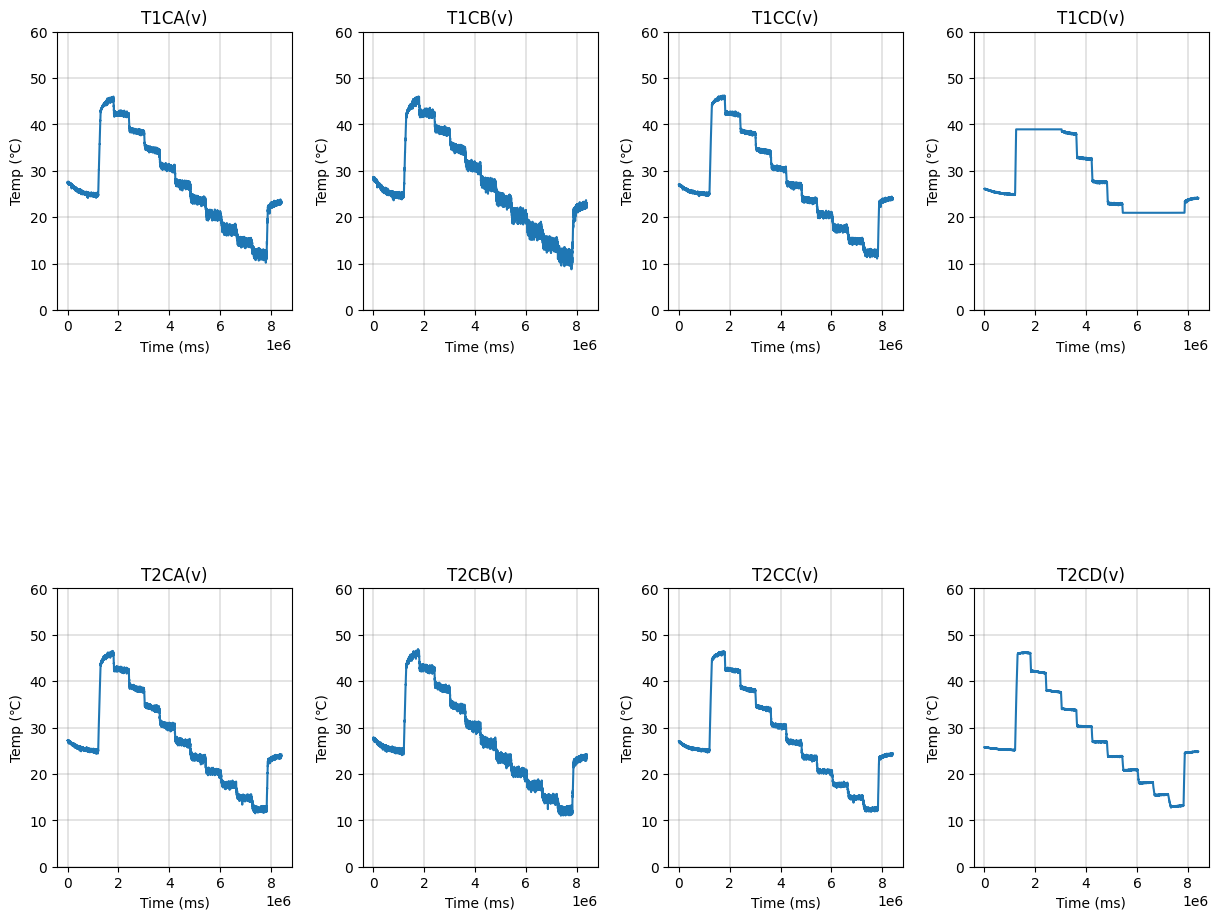

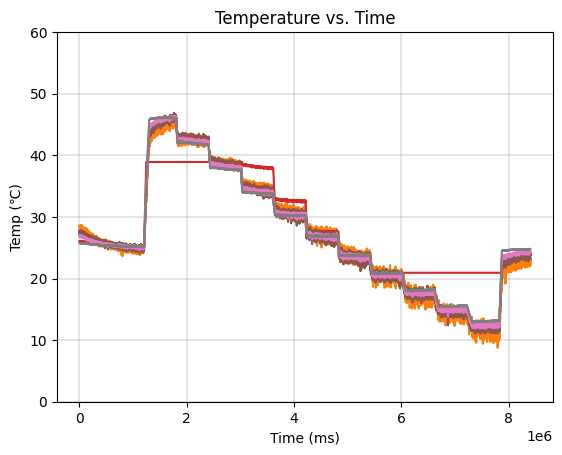

In [64]:
#obtain curves for data
temp_popt = {}
temp_pcov = {}

#fig, ax = plt.subplots(figsize = (10, 5))
bb_index = np.arange(1.2e6,8.4e6,0.6e6)
data_temp = data.copy()
temp_error = pd.DataFrame()
i = 1
for chan in channel_col:
    #apply linear fit for each channel
    temp_popt[chan], temp_pcov[chan] = curve_fit(linear_fit, ch_avgs[chan], ch_avgs["Temp"])
    calc_temp = linear_fit(data[chan], *temp_popt[chan])
    data_temp[chan] = calc_temp
    ax = plt.subplot(3, 4, i)
    plt.subplots_adjust(left=0.1, right=1.9, bottom=0.1, top=3, wspace=0.3, hspace=1)
    #plt.plot(data["Time(ms)"], calc_temp)
    plt.plot(data_temp.loc[:,"Time(ms)"], data_temp[chan])
    plt.xlabel("Time (ms)")
    plt.ylabel("Temp (\N{DEGREE CELSIUS})")
    plt.title(chan)
    plt.grid(color='gray', linestyle='-', linewidth=0.3)
    #plt.legend(channel_col, fontsize = 5)
    plt.ylim((temp_ranges.min() - 5,temp_ranges.max() + 5))
    i += 1

plt.figure()
for chan in channel_col:
    plt.plot(data["Time(ms)"], data_temp[chan])
    plt.xlabel("Time (ms)")
    plt.ylabel("Temp (\N{DEGREE CELSIUS})")
    plt.title("Temperature vs. Time")
    plt.grid(color='gray', linestyle='-', linewidth=0.3)
    #plt.legend(channel_col, fontsize = 5)
    plt.ylim((temp_ranges.min() - 5,temp_ranges.max() + 5))
    #plt.scatter(bb_index, bb_df['BB Temp'])

# -------------UNCOMMENT FOR ERROR CALC, REQUIRES BB TEMPS------------------#
""" #Plot error
plt.figure()
lower_bound = offset
#display(data_temp)
for i in range(0, bb_df['BB Temp'].size):
    bb_temp = bb_df['BB Temp']
    data_temp_interval = data_temp[(data_temp["Time(ms)"] > (lower_bound)) & (data_temp["Time(ms)"] < (lower_bound + time_interval_ms))]
    #display(data_temp_interval)
    temp_error = pd.concat([temp_error, ((abs((data_temp_interval[channel_col] - bb_temp[i])/bb_temp[i])) * 100)]) #convert the voltage to a temp and calculate percent error
    lower_bound += time_interval_ms
temp_times = data_temp[(data_temp["Time(ms)"] > (1200000)) & (data_temp["Time(ms)"] < (lower_bound))]["Time(ms)"]
temp_error.insert(loc = 0,column = 'Time(ms)', value = temp_times)

for ch in channel_col:
    plt.plot(temp_error["Time(ms)"], temp_error[ch])

plt.xlabel("Time (ms)")
plt.ylabel("Percent Error (%)")
plt.title("Temperature Percent Error vs. Time")
plt.grid(color='gray', linestyle='-', linewidth=0.3)
plt.legend(channel_col, fontsize = 5)
plt.scatter(bb_index, bb_df['BB Temp'])
display(temp_error)
plt.plot(data["Time(ms)"], linear_fit(data["T2CD(v)"], *temp_popt["T2CD(v)"]))
plt.plot(data["T1CB(v)"], linear_fit(data["T1CB(v)"], *temp_popt["T1CB(v)"])) """
# -------------UNCOMMENT FOR ERROR CALC, REQUIRES BB TEMPS------------------#


,Time(ms),T1CA(v),T1CB(v),T1CC(v),T1CD(v),T1Therm(c),T2CA(v),T2CB(v),T2CC(v),T2CD(v),T2Therm(c)
TPP55,359184.0,1.786555,2.533139,1.181452,0.604313,0.140756,1.671656,2.096994,1.106344,0.274461,0.151261
TPP50,359188.0,1.096448,1.616301,0.807131,0.357313,0.107578,1.190462,1.678478,0.839308,0.207972,0.114535
TPP45,358064.0,1.820107,2.758097,1.274497,0.000034,0.423680,1.813179,2.546829,1.162717,0.304392,0.432409
TPP40,358053.0,1.480562,2.223629,1.109757,0.000030,0.456128,1.498315,1.998853,1.033855,0.409802,0.446445
TPP35,359218.0,1.399499,2.129186,1.040499,0.000039,0.280052,1.394603,1.853456,0.988362,0.356062,0.278479
TPP30,359227.0,1.568585,2.361138,1.173296,0.633540,0.117026,1.674356,2.398601,1.162181,0.316247,0.116689
TPP25,359204.0,2.026874,3.121515,1.527437,0.616470,0.015320,1.904249,2.746511,1.246165,0.248484,0.018483
TPP20,359187.0,2.217938,3.448524,1.637555,0.595437,0.089929,1.986634,2.767093,1.260976,0.266499,0.102980
TPP15,358061.0,2.256120,3.569975,1.566552,0.538928,0.150678,2.239536,3.283781,1.426658,0.285478,0.151606
TPP10,359199.0,2.483399,3.761923,1.691552,0.000039,0.189237,2.225398,3.243386,1.428193,0.239188,0.178212


' for ch in channel_col:\n    plt.scatter(temp_ranges, conv_ch_avgs[ch])\nplt.xlabel("BB Temp. (℃)")\nplt.ylabel("Average Recorded Temp. (℃)")\nplt.title("Avg. Temp. vs. BB Temp")\nplt.legend(channel_col, fontsize = 5) '

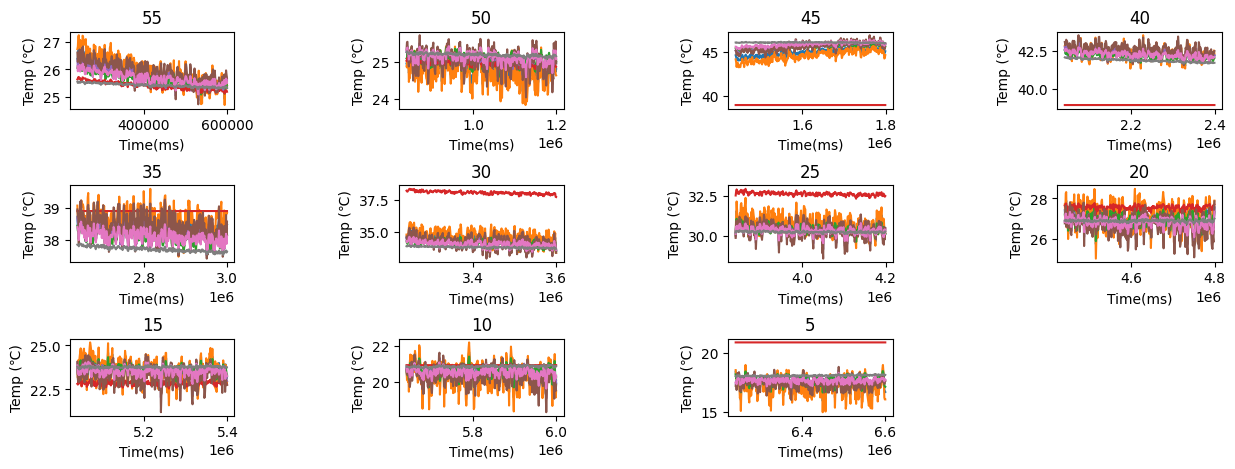

In [65]:
#calculate noise in temperature domain
conv_temp_dict = {}
avg_conv_temp_dict = {}
plt.figure()

conv_t_df = pd.DataFrame()
conv_ch_avgs = pd.DataFrame()
conv_ch_std_dev = pd.DataFrame()

lower_bound = offset
#for each segmented temp data, convert voltage to temps and calculate mean/standard deviation
for i in range(0, temp_ranges.size):
    conv_temp_dict[str(temp_ranges[i])] = data_temp[(data_temp["Time(ms)"] > (lower_bound+begin_cutoff)) & (data_temp["Time(ms)"] < (lower_bound + time_interval_ms-end_cutoff))]
    lower_bound += time_interval_ms

i = 1
#for each BB temp, find the average and standard deviation of the recorded temperature
for temp in conv_temp_dict: 
    temp_segment = conv_temp_dict[temp]
    conv_ch_avgs[temp] = temp_segment[channel_col].mean()
    conv_ch_std_dev[temp] = temp_segment[channel_col].std()
    max_temp = temp_segment.max() #get max temps

    min_temp = temp_segment.min() #get min temps 

    conv_tpp = max_temp - min_temp
    conv_tpp_df = pd.DataFrame({'TPP' + str(temp): conv_tpp}).T
    conv_t_df = pd.concat([conv_t_df, conv_tpp_df])
    ax = plt.subplot(3, 4, i)
    plt.subplots_adjust(left=0.1, right=1.9, bottom=0.1, top=0.9, wspace=1, hspace=1)

    plt.plot(temp_segment.loc[:,"Time(ms)"], temp_segment.loc[:,channel_col])
    plt.title(temp)
    plt.ylabel("Temp (\N{DEGREE CELSIUS})")
    plt.xlabel("Time(ms)")
    i += 1

#add converted temp averages and std deviations to the dataframe and plot them
conv_ch_avgs=conv_ch_avgs.T
conv_ch_avgs.insert(loc = 0, column = 'Temp', value = temp_ranges)
conv_ch_std_dev =conv_ch_std_dev.T
conv_ch_std_dev.insert(loc = 0, column = 'Temp', value = temp_ranges)
#display(conv_ch_avgs)
#display(conv_ch_std_dev)
display(conv_t_df)
""" for ch in channel_col:
    plt.scatter(temp_ranges, conv_ch_avgs[ch])
plt.xlabel("BB Temp. (\N{DEGREE CELSIUS})")
plt.ylabel("Average Recorded Temp. (\N{DEGREE CELSIUS})")
plt.title("Avg. Temp. vs. BB Temp")
plt.legend(channel_col, fontsize = 5) """

Calculating Temperature to Radiance Curves

,Wavelength,T1CA(v),T1CB(v),T1CC(v),T1CD(v),T2CA(v),T2CB(v),T2CC(v),T2CD(v)
0,0.000008,0.000187,0.000133,0.002295,0.000338,1.404026e-07,4.454326e-07,0.000000e+00,0.000238
1,0.000008,-0.000067,-0.000430,0.001002,-0.000545,8.424158e-08,4.136160e-07,0.000000e+00,0.000238
2,0.000008,0.000286,-0.000307,-0.000578,-0.000681,1.123221e-07,6.363323e-08,0.000000e+00,0.000238
3,0.000008,0.001145,0.000409,-0.000880,-0.000311,8.424158e-08,-2.227163e-07,0.000000e+00,0.000238
4,0.000008,0.001702,0.000956,0.000748,-0.000220,-1.684832e-07,-2.863495e-07,0.000000e+00,0.000238
...,...,...,...,...,...,...,...,...,...
522,0.000014,0.000311,0.002002,0.002871,-0.003243,3.436972e-03,1.652109e-03,1.935983e-109,0.883726
523,0.000014,-0.002504,0.003802,-0.003127,-0.003970,1.564787e-03,1.181987e-03,2.387713e-112,0.714796
524,0.000014,-0.002829,0.007300,-0.003019,0.001566,1.566472e-03,2.011542e-03,2.645844e-115,0.476531
525,0.000014,-0.000525,0.009125,0.002786,0.007141,5.124022e-03,4.265462e-03,2.632938e-118,0.238265


,Temperature,T1CA(v),T1CB(v),T1CC(v),T1CD(v),T2CA(v),T2CB(v),T2CC(v),T2CD(v)
0,55,1.547446e+07,1.552832e+07,1.554139e+07,1.551138e+07,1.443362e+07,1.355954e+07,1.228401e+07,1.372817e+07
1,50,1.427700e+07,1.435758e+07,1.438828e+07,1.438650e+07,1.352568e+07,1.275633e+07,1.160810e+07,1.287503e+07
2,45,1.313945e+07,1.324303e+07,1.328910e+07,1.331230e+07,1.264985e+07,1.197862e+07,1.095088e+07,1.205205e+07
3,40,1.206100e+07,1.218406e+07,1.224334e+07,1.228843e+07,1.180627e+07,1.122664e+07,1.031260e+07,1.125931e+07
4,35,1.104079e+07,1.117999e+07,1.125042e+07,1.131443e+07,1.099503e+07,1.050058e+07,9.693500e+06,1.049686e+07
5,30,1.007786e+07,1.023005e+07,1.030968e+07,1.038979e+07,1.021620e+07,9.800609e+06,9.093804e+06,9.764733e+06
6,25,9.171170e+06,9.333401e+06,9.420404e+06,9.513928e+06,9.469800e+06,9.126871e+06,8.513730e+06,9.062912e+06
7,20,8.319591e+06,8.489111e+06,8.581766e+06,8.686183e+06,8.755822e+06,8.479487e+06,7.953482e+06,8.391350e+06
8,15,7.521906e+06,7.696169e+06,7.792878e+06,7.905818e+06,8.074207e+06,7.858545e+06,7.413244e+06,7.749958e+06
9,10,6.776811e+06,6.953477e+06,7.052762e+06,7.172019e+06,7.424852e+06,7.264101e+06,6.893184e+06,7.138610e+06


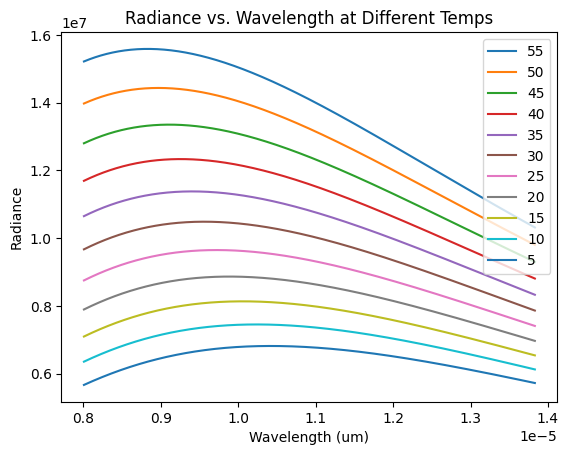

In [66]:
#units are watt/meter squared,

#read in response curve
dex = pd.read_csv("Data/dexter_filters.csv")
dex["Wavelength"] = dex["Wavelength"] * 1e-6
#normalize each channel by dividing by the max
dex_norm = dex
#chans = ['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8']
for ch in channel_col:
    dex_norm[ch] = dex[ch] / dex[ch].abs().max()

display(dex_norm)


#use Planck radiance equation to obtain curves
planck = pd.DataFrame()
planck["Wavelength"] = dex_norm["Wavelength"]
plt.figure()
for temp in temp_ranges:
    planck[temp] = planck_radiance((planck["Wavelength"]), temp)
    plt.plot(planck["Wavelength"], planck[temp])
    plt.legend(temp_ranges)
    plt.title("Radiance vs. Wavelength at Different Temps")
    plt.xlabel("Wavelength (um)")
    plt.ylabel("Radiance")

be_radiance = pd.DataFrame()
be_radiance["Temperature"] = temp_ranges

#calculate BE radiance for each temperature at each channel
for ch in channel_col:
    radiance = []
    for temp in temp_ranges:
        numerator = 0
        for a, b in zip(planck[temp], dex_norm[ch]):
            numerator += a * b
        
        denominator = dex_norm[ch].sum()
        radiance.append(numerator/denominator)
    be_radiance[ch] = radiance

display(be_radiance)



Plot radiance vs. time from data

,Time(ms),T1CA(v),T1CB(v),T1CC(v),T1CD(v),T1Therm(c),T2CA(v),T2CB(v),T2CC(v),T2CD(v),T2Therm(c)
0,839,649.414806,997.344035,396.059893,162.922871,25.423844,714.616305,1066.806454,456.033316,365.752730,24.452456
1,1968,643.974457,992.345392,394.819795,162.830911,25.416807,714.896090,1067.841038,455.450591,365.826462,24.445386
2,3097,645.490395,998.342166,395.812712,163.004582,25.412108,714.467090,1065.703890,455.035477,365.643944,24.441110
3,4226,648.886206,1001.644924,396.702696,163.151121,25.408933,712.981216,1062.763745,454.666545,365.655554,24.439180
4,5355,649.297219,1003.857530,396.722832,163.091330,25.406849,712.727216,1060.924345,454.628277,365.719634,24.436687
...,...,...,...,...,...,...,...,...,...,...,...
7437,8401402,541.916821,780.628402,351.972537,152.069026,26.123086,631.978556,921.361038,412.961251,352.561615,25.155492
7438,8402531,547.284252,788.942737,353.357771,152.247371,26.122796,627.341820,915.638925,411.202456,352.530628,25.155707
7439,8403660,554.764760,806.408401,356.388714,152.551993,26.124535,629.013669,917.589608,411.613129,352.328509,25.155830
7440,8404789,541.039622,769.986583,349.911476,151.747729,26.125180,623.758667,903.388705,408.476074,352.143429,25.156230


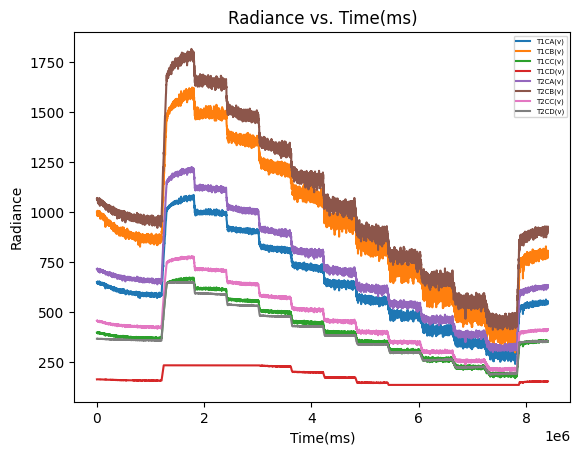

In [67]:
data_radiance = pd.DataFrame()
data_radiance = data.copy()
radiance_popt = {}
radiance_pcov = {}
plt.figure()
for chan in channel_col:
    #determine line of best fit for temperature to radiance function using lookup table, then convert temps using that line
    radiance_popt[chan], radiance_pcov[chan] = curve_fit(linear_fit, be_radiance["Temperature"], be_radiance[chan])
    temp_to_radiance = linear_fit(data_temp[chan], *temp_popt[chan] )
    data_radiance[chan] = temp_to_radiance
    plt.plot(data_temp["Time(ms)"], data_radiance[chan])
    plt.xlabel("Time(ms)")
    plt.ylabel("Radiance")
    plt.legend(channel_col, fontsize = 5)
plt.title("Radiance vs. Time(ms)")
display(data_radiance)

,Temp,T1CA(v),T1CB(v),T1CC(v),T1CD(v),T2CA(v),T2CB(v),T2CC(v),T2CD(v)
55,55,1052.407276,1554.743559,659.638806,233.023187,1192.211899,1750.541261,765.558662,646.960054
50,50,996.461869,1491.273561,614.827452,233.023159,1117.028453,1649.832506,710.389034,590.129745
45,45,908.213652,1363.886911,557.604318,233.023087,1009.695429,1489.272554,641.754815,532.343288
40,40,815.443824,1224.358338,500.663093,228.666629,901.336390,1324.467355,574.470209,478.167352
35,35,725.374345,1086.079700,446.843841,198.876778,799.033544,1169.156649,511.357902,428.064457
30,30,640.628060,955.327643,396.591034,171.233442,704.202269,1025.669210,452.927266,381.633519
25,25,560.352709,830.383810,349.433782,145.498095,617.352775,895.775356,398.816194,338.392273
20,20,484.714950,712.032114,305.150173,135.025009,537.600544,778.042778,348.677269,297.949716
15,15,412.463345,598.455761,262.851743,135.024957,460.957824,662.874137,300.706151,259.725022
10,10,345.610590,492.931827,223.272930,135.024951,388.736310,553.901738,255.289593,223.810806


,Temp,T1CA(v),T1CB(v),T1CC(v),T1CD(v),T2CA(v),T2CB(v),T2CC(v),T2CD(v)
55,55,14.993203,30.061042,5.848210,0.000032,15.407657,28.591557,6.418084,0.722778
50,50,5.783366,13.335821,2.941461,0.000035,7.365972,14.993858,3.533045,1.801149
45,45,6.648266,14.337807,3.201516,0.000034,8.506097,16.963215,3.911924,1.488824
40,40,7.643397,17.108851,3.433450,0.809202,9.158321,18.485765,3.956269,1.052146
35,35,8.711193,19.563774,3.684979,0.643409,9.187383,19.272646,3.880496,0.723869
30,30,9.805642,22.552830,4.156394,0.593882,9.553198,20.007046,3.873069,0.635859
25,25,10.876987,24.864384,4.405037,0.594819,10.057733,21.293375,4.081588,0.695489
20,20,10.514866,24.363934,4.400360,0.000034,8.445551,18.082342,3.392492,0.686518
15,15,12.603227,28.613846,5.106203,0.000033,8.552195,18.062607,3.383339,0.733631
10,10,11.859122,26.929281,4.820518,0.000032,8.432843,18.179879,3.465502,0.807818


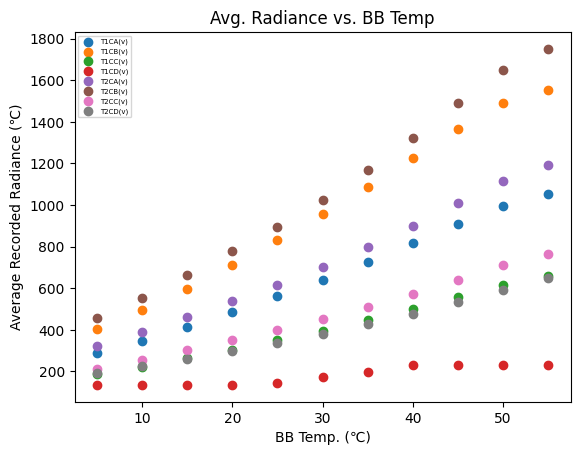

In [68]:
#calculate radiance in temperature domain
rad_dict = {}
plt.figure()

rad_ch_avgs = pd.DataFrame()
rad_ch_std_dev = pd.DataFrame()
lower_bound = 1200000
#for each segmented temp data, convert voltage to temps and calculate mean/standard deviation
for i in range(0, temp_ranges.size):
    rad_dict[str(temp_ranges[i])] = data_radiance[(data_radiance["Time(ms)"] > (lower_bound+120000)) & (data_radiance["Time(ms)"] < (lower_bound + time_interval_ms-30000))]
    lower_bound += time_interval_ms

#for each BB temp, find the average and standard deviation of the recorded temperature
for rad in rad_dict: 
    rad_segment = rad_dict[rad]
    rad_ch_avgs[rad] = rad_segment[channel_col].mean()
    rad_ch_std_dev[rad] = rad_segment[channel_col].std()
  
rad_ch_avgs=rad_ch_avgs.T
rad_ch_avgs.insert(loc = 0, column = 'Temp', value = temp_ranges)
rad_ch_std_dev =rad_ch_std_dev.T
rad_ch_std_dev.insert(loc = 0, column = 'Temp', value = temp_ranges)
display(rad_ch_avgs)
display(rad_ch_std_dev)
for ch in channel_col:
    plt.scatter(temp_ranges, rad_ch_avgs[ch])
plt.xlabel("BB Temp. (\N{DEGREE CELSIUS})")
plt.ylabel("Average Recorded Radiance (\N{DEGREE CELSIUS})")
plt.title("Avg. Radiance vs. BB Temp")
plt.legend(channel_col, fontsize = 5)